In [2]:
# Importing necessary modules for data analysis, cleaning, wrangling, and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mushrooms.csv')

## Lots of useful info about this dataset on kaggle:

Attribute Information: (classes: edible=e, poisonous=p)
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [4]:
print(df.head())
print(df.columns)
print(df.dtypes)

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [5]:
print(df.describe())
print(df.info())
print(df.shape)

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [6]:
for col in df.columns:
    if df[col].nunique() <= 1:
        print(col)

veil-type


We can see from describing the dataset that veil-type only has one unique value: p. This will allow for this column to be excluded from analysis, as it will have no impact on the results of the model.

In [7]:
df = df.drop(columns=['veil-type'])

## Information about the dataset:
- 23 columns, each with different attributes associated with specific mushrooms, as well as their edibility/ poisonousness. 8124 rows, each of which representing a unique mushroom.
- Mostly categorical nominal columns, with a couple categorical ordinal columns, namely: gill-spacing, gill-size, possibly population?
- One numerical discrete column: ring-number, which will be mapped to numeric values and changed type from str to int.
- For our model building, labels will be the edibility (1 for edible, 0 for poisonous)
- It seems that random forest modelling could be a good for this data. Logistic regression could be good too. LR would allow for the modification of the classification threshold in order to make the model more sensitive to poisonous mushrooms (better to classify an edible mushroom as poisonous, than a poisonous mushroom as edible). With either of these models, feature importance will be utilised in order to determine which features are the best/ most significant predictors of edibility or not.

Next: visualise the distribution of the different attributes of poisonous mushrooms to see if any can clearly be of use predicting poisonousness.
For this I will select the poisonous mushroom data, and iterate through the attribute columns and create a series of graphs displaying the distribution of different features. I think a countplot will be best for this visualisation.

In [8]:
df_poison = df[df['class'] == 'p']
df_poison = df_poison.drop(columns=['class'])
print(df_poison.head())

   cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0          x           s         n       t    p               f            c   
3          x           y         w       t    p               f            c   
8          x           y         w       t    p               f            c   
13         x           y         w       t    p               f            c   
17         x           s         n       t    p               f            c   

   gill-size gill-color stalk-shape  ... stalk-surface-above-ring  \
0          n          k           e  ...                        s   
3          n          n           e  ...                        s   
8          n          p           e  ...                        s   
13         n          k           e  ...                        s   
17         n          n           e  ...                        s   

   stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                         s

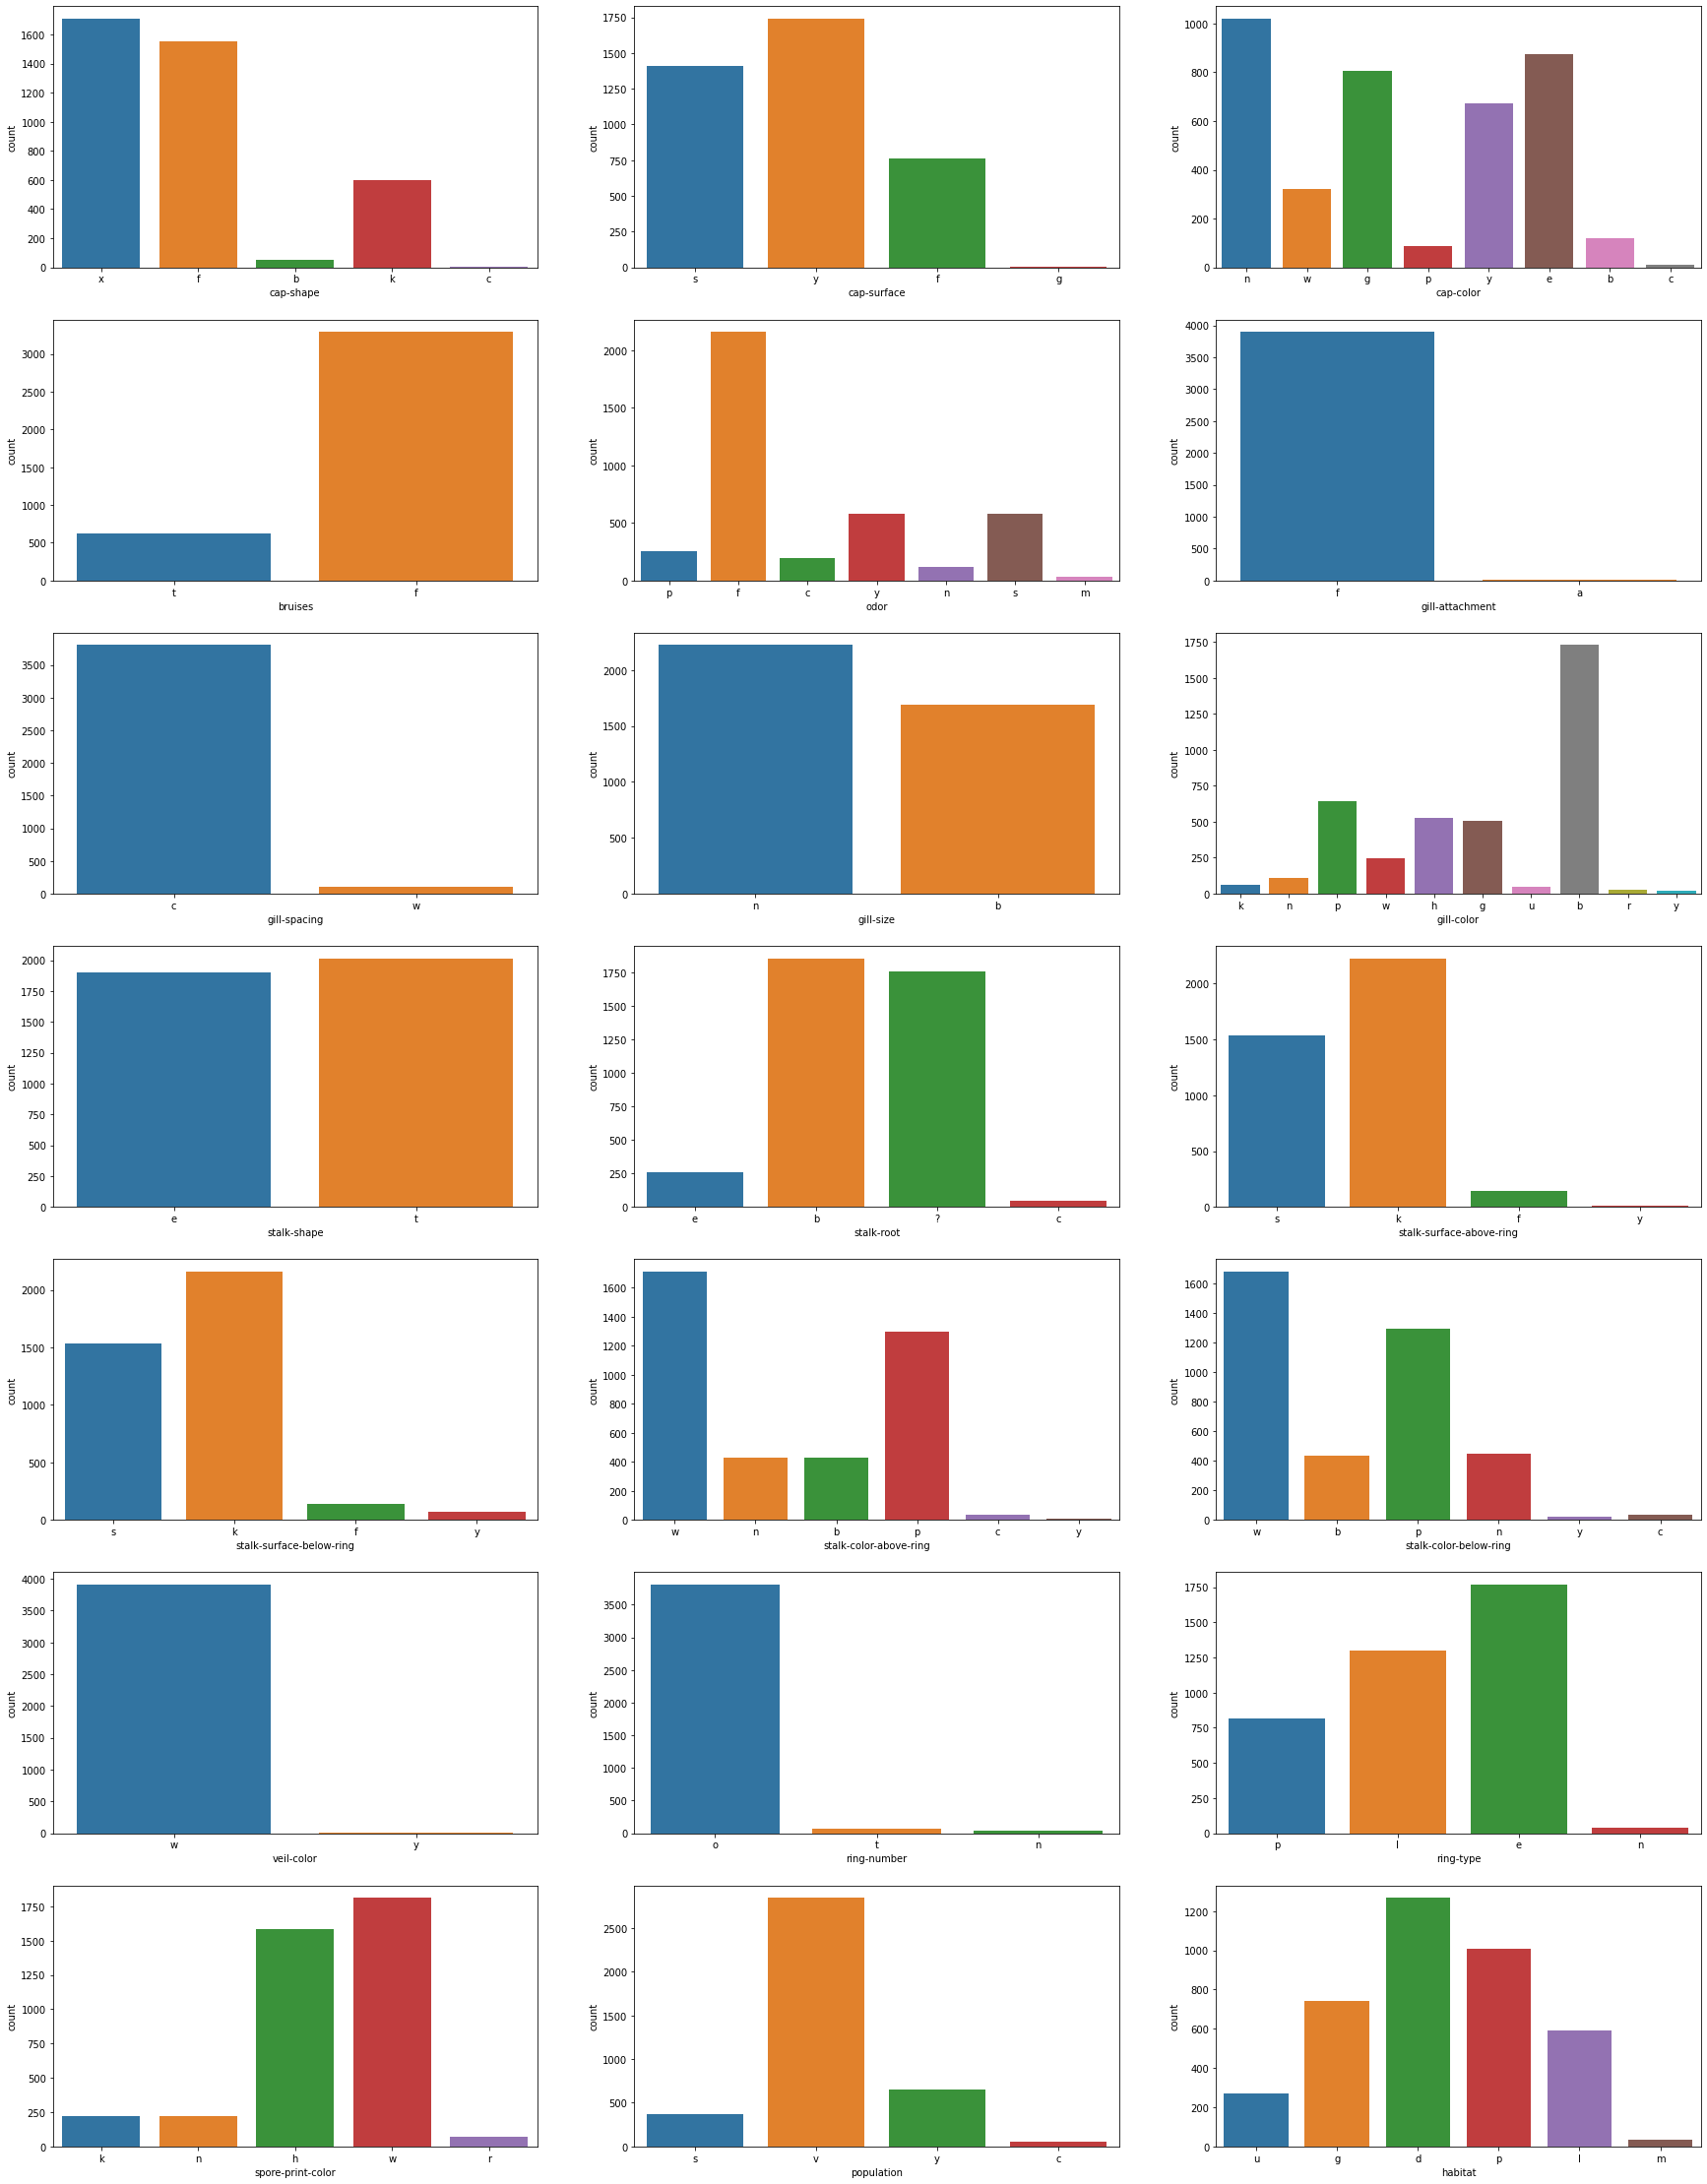

In [9]:
fig, ax = plt.subplots(7, 3, figsize=(30, 40))
n=1
for col in df_poison.columns:
    plt.subplot(7, 3, n)
    sns.countplot(data=df_poison, x=df_poison[col])
    n+=1
plt.show()

From these visualisations of distributions of different attributes of poisonous mushrooms, we can see that several are highly skewed, and these would likely be very useful in determining if a mushroom is poisonous or not.

## Project scope:
## Foraging (particularly for mushrooms) has grown in popularity in recent years, and with many mushrooms (especially LBMs) very similar in appearance, A ML model which could accurately predict the toxicity of mushrooms would be useful for beginner foragers. What are some key features that beginner foragers can look out for and learn to recognise when foraging for mushrooms for the first time in order to pretect themselves from picking toxic mushrooms?
### From the visualisations above I can see that certain features are highly skewed regarding the toxic mushrooms. Which features are these which will be the most significant predictors of edibility/ poisonousness?

- After visualisation, it appears that bruises, gill-attachment, odor, gill-spacing, gill-color, veil-color, ring-number and population are likely to be indicative of toxicity. Let's see how accurately we can predict edibility using these attributes.

In [10]:
# First, check for null values in the data

print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [11]:
# Check for duplicate rows

print(df.duplicated(keep='first').sum())

0


In [47]:
labels = df[['class']]
data = df[['bruises', 'gill-attachment', 'odor', 'gill-spacing', 'gill-color', 'veil-color', 'ring-number', 'spore-print-color', 'population']]

In [48]:
for col in data.columns:
    print(col, ':', data[col].unique())

bruises : ['t' 'f']
gill-attachment : ['f' 'a']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-spacing : ['c' 'w']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']


It looks like these are mostly nominal categorical columns. The exceptions are bruises (true/false is ordinal) and ring-number, which is actually discrete numerical. gill-spacing could be argued to be continuous too, but as there is not a consistent different between 'close' and 'wide' spacing, I shall classify this as ordinal.
All nominal columns will be One Hot Encoded for this analysis, the ordinal column will be mapped to binary 0/1, and the ring-number column will be mapped to 0, 1 and 2.

In [49]:
data = pd.get_dummies(data=data, columns=['gill-attachment', 'odor', 'gill-spacing', 'gill-color', 'spore-print-color', 'veil-color', 'population'])
data.bruises = data.bruises.map({'f':0, 't':1})
data['ring-number'] = data['ring-number'].map({'n':0, 'o':1, 't':2})

In [50]:
for col in data.columns:
    print(col, ':', data[col].unique())

bruises : [1 0]
ring-number : [1 2 0]
gill-attachment_a : [0 1]
gill-attachment_f : [1 0]
odor_a : [0 1]
odor_c : [0 1]
odor_f : [0 1]
odor_l : [0 1]
odor_m : [0 1]
odor_n : [0 1]
odor_p : [1 0]
odor_s : [0 1]
odor_y : [0 1]
gill-spacing_c : [1 0]
gill-spacing_w : [0 1]
gill-color_b : [0 1]
gill-color_e : [0 1]
gill-color_g : [0 1]
gill-color_h : [0 1]
gill-color_k : [1 0]
gill-color_n : [0 1]
gill-color_o : [0 1]
gill-color_p : [0 1]
gill-color_r : [0 1]
gill-color_u : [0 1]
gill-color_w : [0 1]
gill-color_y : [0 1]
spore-print-color_b : [0 1]
spore-print-color_h : [0 1]
spore-print-color_k : [1 0]
spore-print-color_n : [0 1]
spore-print-color_o : [0 1]
spore-print-color_r : [0 1]
spore-print-color_u : [0 1]
spore-print-color_w : [0 1]
spore-print-color_y : [0 1]
veil-color_n : [0 1]
veil-color_o : [0 1]
veil-color_w : [1 0]
veil-color_y : [0 1]
population_a : [0 1]
population_c : [0 1]
population_n : [0 1]
population_s : [1 0]
population_v : [0 1]
population_y : [0 1]


In [51]:
labels = labels['class'].map({'e':0, 'p':1})

In [52]:
print(labels)
print(type(labels))
labels_final = labels.ravel()
print(labels_final)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64
<class 'pandas.core.series.Series'>
[1 0 0 ... 0 1 0]


In [53]:
# Importing necessary modules for ML model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [162]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels_final, test_size=0.2, random_state=1)

In [163]:
print(len(train_data), len(test_data))

6499 1625


In [164]:
scaler = StandardScaler()
scaler.fit_transform(train_data)
scaler.transform(test_data)

model = LogisticRegression(random_state = 1)
model.fit(train_data, train_labels)

LogisticRegression(random_state=1)

In [165]:
print(model.predict(test_data))
print(model.predict_proba(test_data))

[0 1 1 ... 1 0 0]
[[9.99896804e-01 1.03195830e-04]
 [4.26315463e-02 9.57368454e-01]
 [3.44653282e-02 9.65534672e-01]
 ...
 [2.69203710e-05 9.99973080e-01]
 [9.99926426e-01 7.35735904e-05]
 [9.99052745e-01 9.47254634e-04]]


In [166]:
print(model.score(train_data, train_labels))
print(model.score(test_data, test_labels))

0.9995383905216187
0.9969230769230769


In [167]:
predictions = np.where(model.predict_proba(test_data)[:, 1] >= 0.3, 1, 0)
print(predictions)
print(accuracy_score(test_labels, predictions))
print(recall_score(test_labels, predictions))
print(precision_score(test_labels, predictions))
print(f1_score(test_labels, predictions))

[0 1 1 ... 1 0 0]
1.0
1.0
1.0
1.0


In [168]:
target_names = ['Edible', 'Poisonous']
print(classification_report(test_labels, predictions, target_names = target_names))
print(confusion_matrix(test_labels, predictions))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       820
   Poisonous       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


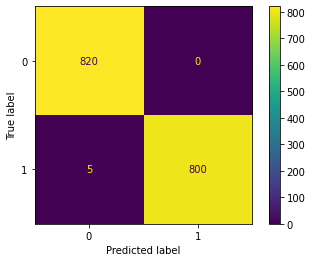

In [169]:
plot_confusion_matrix(model, test_data, test_labels)
plt.show()

In [75]:
coefficients = model.coef_
coefficients = coefficients.tolist()[0]
for i in range(len(data.columns)):
    print(data.columns[i] + ': ' + str(coefficients[i]))

bruises: -1.7162045060262674
ring-number: -1.587334592951327
gill-attachment_a: -1.2994102962844853
gill-attachment_f: 1.2993379951993824
odor_a: -3.531493276082693
odor_c: 3.884332660364937
odor_f: 3.536080907928548
odor_l: -3.4949588445110247
odor_m: 0.1353772611883129
odor_n: -5.501703165135472
odor_p: 4.201482026564631
odor_s: 0.3863376423417041
odor_y: 0.38447248625594344
gill-spacing_c: 1.1482149223597284
gill-spacing_w: -1.1482872234448303
gill-color_b: 0.7882211547919024
gill-color_e: -1.0076438168156538
gill-color_g: 0.3391621072650731
gill-color_h: -0.07199574969291667
gill-color_k: -0.27863805613685183
gill-color_n: -0.463568923640297
gill-color_o: -0.36646625761836
gill-color_p: -0.22596202411730562
gill-color_r: 1.2030636016999268
gill-color_u: -0.38456634743358037
gill-color_w: 0.13241584974386117
gill-color_y: 0.3359061608690967
spore-print-color_b: -0.48789703655537836
spore-print-color_h: -0.5448294646648929
spore-print-color_k: -2.2932136904854628
spore-print-color_n:

In [145]:
forest = RandomForestClassifier(n_estimators=20, random_state=1)
forest.fit(train_data, train_labels)

RandomForestClassifier(n_estimators=20, random_state=1)

In [146]:
print(forest.predict_proba(test_data))

print(forest.score(train_data, train_labels))
print(forest.score(test_data, test_labels))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
1.0
1.0


In [147]:
predictions = np.where(forest.predict_proba(test_data)[:, 1] >= 0.3, 1, 0)
print(predictions)
print(accuracy_score(test_labels, predictions))
print(recall_score(test_labels, predictions))
print(precision_score(test_labels, predictions))
print(f1_score(test_labels, predictions))

[0 1 1 ... 1 0 0]
1.0
1.0
1.0
1.0


In [148]:
target_names = ['Edible', 'Poisonous']
print(classification_report(test_labels, predictions, target_names = target_names))
print(confusion_matrix(test_labels, predictions))

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       820
   Poisonous       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[820   0]
 [  0 805]]


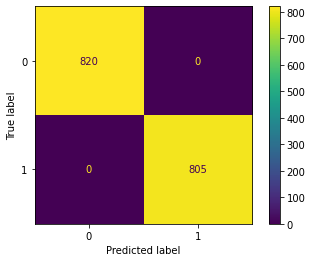

In [149]:
plot_confusion_matrix(forest, test_data, test_labels)
plt.show()

In [150]:
features = forest.feature_importances_
features = features.tolist()
for i in range(len(data.columns)):
    print(data.columns[i] + ': ' + str(features[i]))

odor_a: 0.027375226972259435
odor_c: 0.009761278074102337
odor_f: 0.0015900172273047692
odor_l: 9.164896599760512e-05
odor_m: 0.001597608346082353
odor_n: 0.00019976646929452507
odor_p: 2.4969756653922262e-05
odor_s: 0.0006111221009461549
odor_y: 0.0032668547457402053
gill-spacing_c: 0.00011216274194499191
gill-spacing_w: 0.00805759233373361
gill-size_b: 0.002331589347915616
gill-size_n: 0.006748966116821789
gill-color_b: 0.0003339886596462316
gill-color_e: 0.0
gill-color_g: 0.0019098576525466554
gill-color_h: 0.00420916447308593
gill-color_k: 0.004043800396497095
gill-color_n: 0.0
gill-color_o: 0.0
gill-color_p: 0.003717785946941931
gill-color_r: 0.003599861638094404
gill-color_u: 0.002004405110886373
gill-color_w: 0.006807504225705733
gill-color_y: 0.08334972008944978
stalk-root_?: 0.0021606127897889904
stalk-root_b: 0.0
stalk-root_c: 0.10427302622659038
stalk-root_e: 0.012569030378154267
stalk-root_r: 0.004040187138259407
stalk-surface-above-ring_f: 0.009300101782351512
stalk-surfac

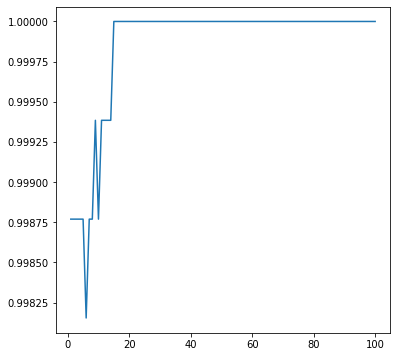

In [151]:
# 99.9% accuracy with 10 estimators (trees). Lets try Random Forest with a bunch of different n_estimators.
scores = []
for i in range(1, 101):
    forest = RandomForestClassifier(n_estimators = i, random_state = 1)
    forest.fit(train_data, train_labels)
    scores.append(forest.score(test_data, test_labels))

ax = plt.figure(figsize = (6, 6))
plt.plot(range(1, 101), scores)
plt.show()

From this graph, it appears that the optimal number of trees is above 17. This evaluation method allows us to fine tune our model and optimise it's performance.

For this specific dataset, consisting of Agaricus and Lepiota Family Mushrooms, the Random Forest Model is 100% accurate in predicting the edibility/toxicity of this specific family of mushrooms, as is the Logistic Regression with a threshold of 30% to err on the side of caution (more likely to classify a mushrooms as toxic than edible if the predicted probability is slightly lower. The skewness of the dataset (and only one family of mushrooms) demonstrates that more data is required to make the model applicable to more mushrooms in a wider range of locations.

Future scope for additional projects: gather more data. Scrape wikipedia or use databases to gather more information on a wider range of mushrooms worldwide. The names of mushrooms would be useful, too, in order to easily and accurately cross-reference the edibility or toxicity of mushrooms classified. Additionally, a multi-model evaluation could be very useful to implement given the complexity of mushrooms classification, and relative similarity between many species (particularly LBMs). A future model could incorporate some key aspects easily identified (spore print, bruises, colours, rings, shape, habitat, population etc., in addition to photographic identification through a deep learning model. This would be highly useful and very applicable to foragers and ensuring the safety of people getting into foraging for the first time.